In [1]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/6L0x472Z_gPxnZRRBVxVaAEsKuPVT9')

In [2]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *




In [35]:
df.groupby("beer_style").count()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,beer_name,beer_abv,beer_beerid
beer_style,,,,,,,,,,,,
Altbier,7741,7741,7741,7741,7741,7741,7737,7741,7741,7741,7223,7741
American Adjunct Lager,30749,30748,30749,30749,30749,30749,30734,30749,30749,30749,28979,30749
American Amber / Red Ale,45751,45751,45751,45751,45751,45751,45740,45751,45751,45751,41740,45751
American Amber / Red Lager,9311,9311,9311,9311,9311,9311,9309,9311,9311,9311,8610,9311
American Barleywine,26728,26728,26728,26728,26728,26728,26721,26728,26728,26728,26274,26728
American Black Ale,11446,11446,11446,11446,11446,11446,11446,11446,11446,11446,11160,11446
American Blonde Ale,12726,12726,12726,12726,12726,12726,12724,12726,12726,12726,10801,12726
American Brown Ale,25297,25297,25297,25297,25297,25297,25291,25297,25297,25297,24137,25297
American Dark Wheat Ale,1470,1470,1470,1470,1470,1470,1469,1470,1470,1470,1195,1470


In [42]:
df[df["beer_style"].isin(["Rye Beer", "Hefeweizen", "Gose", "American IPA"])].groupby("beer_style").count()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,beer_name,beer_abv,beer_beerid
beer_style,,,,,,,,,,,,
American IPA,117586,117584,117586,117586,117586,117586,117568,117586,117586,117586,113164,117586
Gose,686,686,686,686,686,686,686,686,686,686,654,686
Hefeweizen,27908,27908,27908,27908,27908,27908,27901,27908,27908,27908,25928,27908
Rye Beer,10130,10130,10130,10130,10130,10130,10128,10130,10130,10130,9640,10130


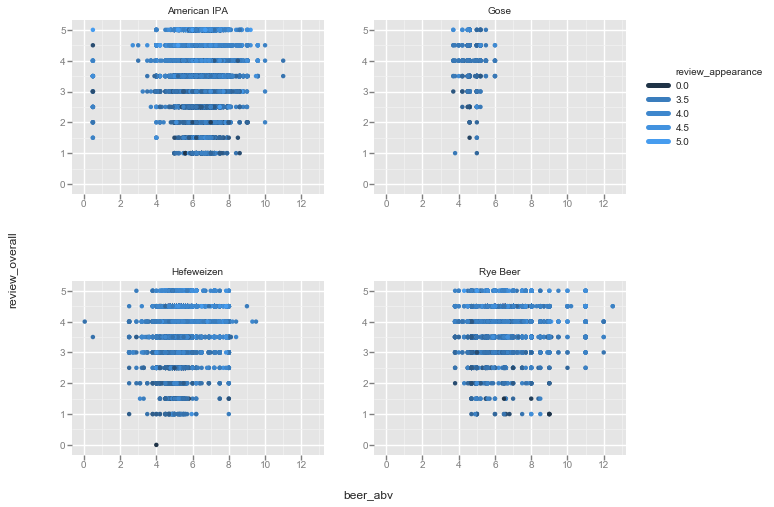

<ggplot: (183094928206)>

In [43]:
ggplot(df[df["beer_style"].isin(["Rye Beer", "Hefeweizen", "Gose", "American IPA"])], 
       aes(y = "review_overall", x = "beer_abv", color = "review_appearance")) + geom_point() + facet_wrap("beer_style")


In [17]:
corr = df.drop(["brewery_id", "review_time", "beer_beerid"], axis = 1).corr()

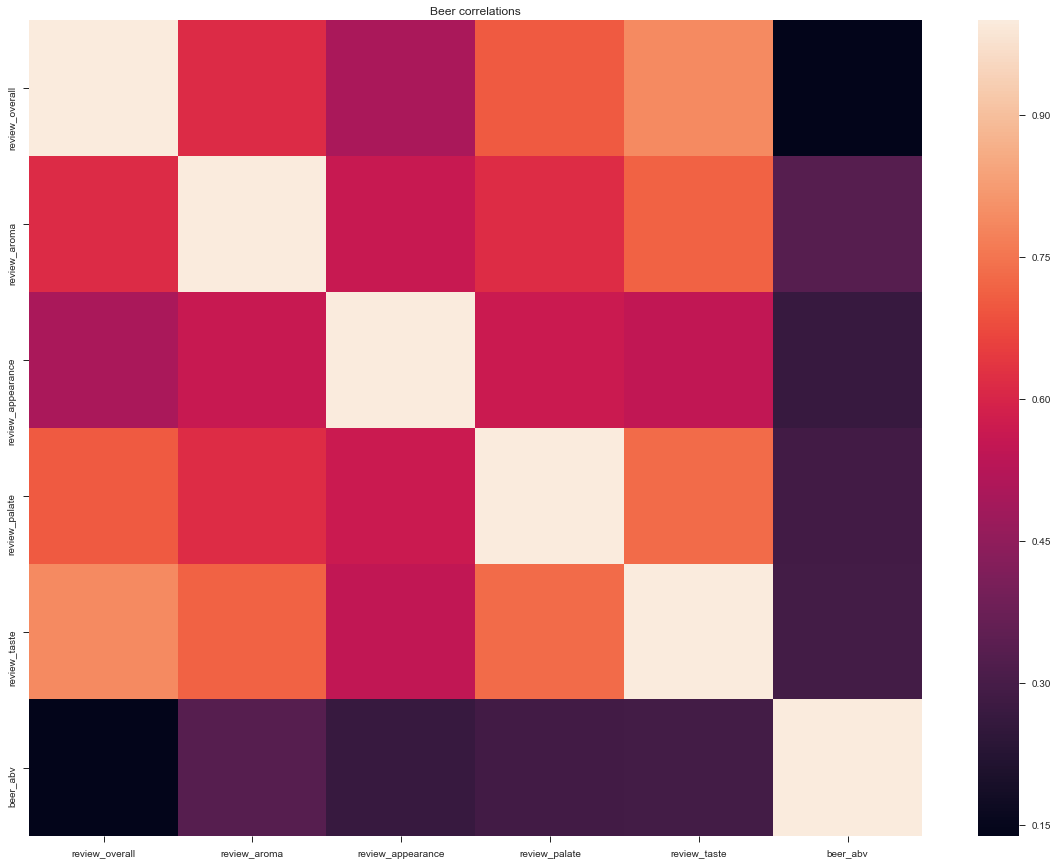

In [18]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Beer correlations")
sns.heatmap(corr)

In [52]:
import sklearn

In [67]:
y = df["review_overall"]
X = df.drop(["review_overall", "brewery_id", "brewery_name", "review_time", 
             "review_profilename", "beer_name", "beer_beerid", "beer_style"],  axis = 1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = .3)

In [68]:
X_train.head()

,review_aroma,review_appearance,review_palate,review_taste,beer_abv
1553043,3.5,3.0,4.0,3.5,5.3
1227028,3.0,3.5,3.5,3.5,7.3
911864,4.0,2.5,2.5,4.0,8.0
57447,4.5,4.5,5.0,4.5,8.5
467843,4.5,3.5,4.0,4.5,6.7


In [69]:
y_train.head()

1553043    3.5
1227028    3.5
911864     3.5
57447      3.5
467843     4.0
Name: review_overall, dtype: float64